# Antenna Beams

Beams of an antenna array can be seen as the output of a Young's double slit experiment. 

The primary beam of an antenna is analogous to the width of the slit and the beam pattern of an array itself is just the diffraction pattern of infinitely thin slits- number of slits being equal to the number of antennas.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

# Review Ray Optics

## Interference

### Remembering the classic Young's double slit experiment

Consider a parallel beam of light of wavelength **$\lambda =$ 800 nm** falling on two infinitely thin slits, distance **d= 4 mm** apart ($\frac{\lambda}{D} \sim 0.5''$). The location of the nulls (maxima) can be computed by arguing that the path difference of the two slits should be $\lambda/2$ ($\lambda$). Therefore, for the nulls

$$d\sin\theta = \left(m+\frac{1}{2}\right)\lambda\qquad m=\pm1,\pm2,\pm3..$$

The intensity of the fringes on a screen at a distance $y >> d$ away can be computed by adding the electric field vectors coherently. The electric field due to the two slits at an arbitrary location P can be written as follows, assuming they are both propagating in the same direction.

$$ E_1 = E_0\sin(kx+\omega t)\qquad E_2 = E_0\sin(kx+\omega t+\phi)$$


$$I \propto (\mathbf{E_1} + \mathbf{E_2})^2$$

$$I = I_0 \cos^2 \left(\frac{\pi d \sin \theta}{\lambda}\right)$$

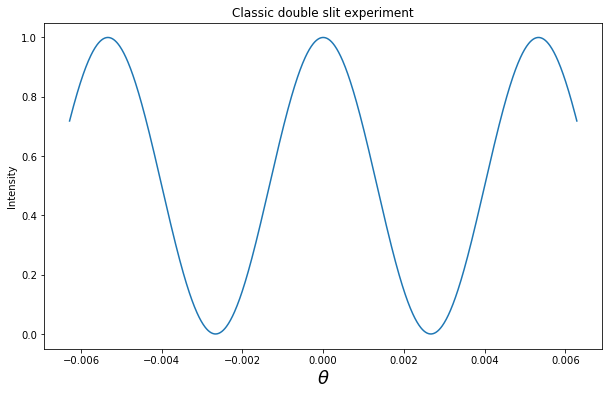

In [16]:
theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
d = 0.15e-3 #m
wv = 800e-9 #m 
I = (np.cos(np.pi*d*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Classic double slit experiment' )

### N slit interference

The output with a generalized N number of slits (after some gory algebra and trignometry) is given by:

$$ I = I_0\frac{\sin^2\left(\frac{N\phi}{2}\right)}{\sin^2\left(\frac{\phi}{2}\right)}$$

$$\phi = \frac{2\pi d \sin \theta}{\lambda}$$

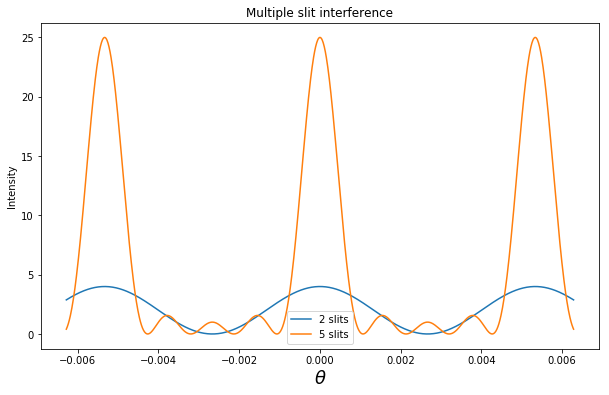

In [17]:
# N slit interference
theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
d = 0.15e-3 #m
wv = 800e-9 #m #d/wv ~ 200
phi = np.pi*d*np.sin(theta)/wv

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Multiple slit interference')

for N in [2,5]:
    I = (np.sin(N*phi)/np.sin(phi))**2
    ax.plot(theta,I,label='%d slits'%N)
ax.legend()

## Diffraction: Slits have a Finite Width

### Single Slit diffraction

$$I = I_0 \text{sinc}^2\left(\frac{\pi w sin \theta}{\lambda}\right)$$

Note the scales of theta (x axis) in all the plots. Interference is visible in large k modes (high spatial frequency) or small angular scales. Diffraction is evident is small k modes (low spatial frequency) or large angular scales.

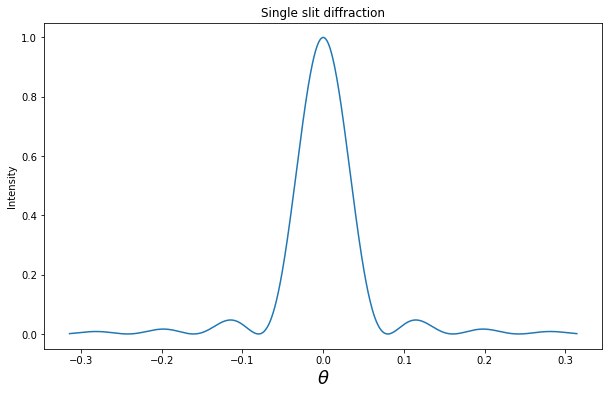

In [19]:
# Diffraction with single slit
theta = np.linspace(-np.pi/10,np.pi/10,num=1000)
wv = 800e-9 #m #d/wv ~ 200
a = 0.01e-3
I = (np.sinc(a*np.sin(theta)/wv))**2

fig,ax = plt.subplots(1,1)
ax.plot(theta,I)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Single slit diffraction')

# Finite width N slit interference

In the most generalised case, we have N slits all with finite width causing both interference and diffraction. The output intensity in this case is given by product of the diffraction pattern and the interference pattern- the diffraction pattern modulates the interference (since diffraction is caused by smaller spatial scales, they effect the larger modes).

$$I = I_0 \frac{\sin^2\left(\frac{N\phi}{2}\right)}{\sin^2\left(\frac{\phi}{2}\right)}\text{sinc}^2\left(\frac{\delta}{2}\right)$$

$$\phi = \frac{2\pi d \sin \theta}{\lambda}$$
$$\delta = \frac{2\pi w \sin \theta}{\lambda}$$

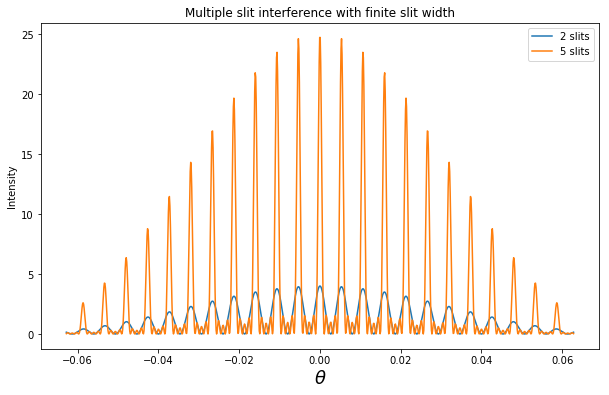

In [20]:
# Interference with finite slit width
theta = np.linspace(-np.pi/50,np.pi/50,num=1000)
wv = 800e-9 #m 
a = 0.01e-3 #m
d = 0.15e-3 #m
phi = np.pi*d*np.sin(theta)/wv

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('Multiple slit interference with finite slit width')

for N in [2,5]: 
    I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
    ax.plot(theta,I,label='%d slits'%N)
ax.legend()

# Moving to Radio Antennas:

**Antenna == Slit**

**Antenna Beam == Width of slit**

Consider two antennas observing the redshifted 21cm emission ($\lambda = 210$cm)  at a spacing $d = 1400$ cm apart.

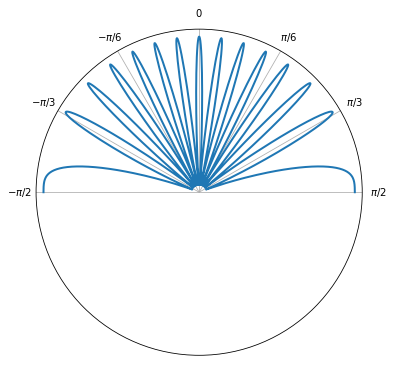

In [26]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
# With HERA specs (in cm)
wv = 200
d = 1400
I1 = (np.cos(np.pi*d*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I1,lw=2,label=r'$\lambda = 210$')

## Effect of changing the wavelength of observation and distance between antennas

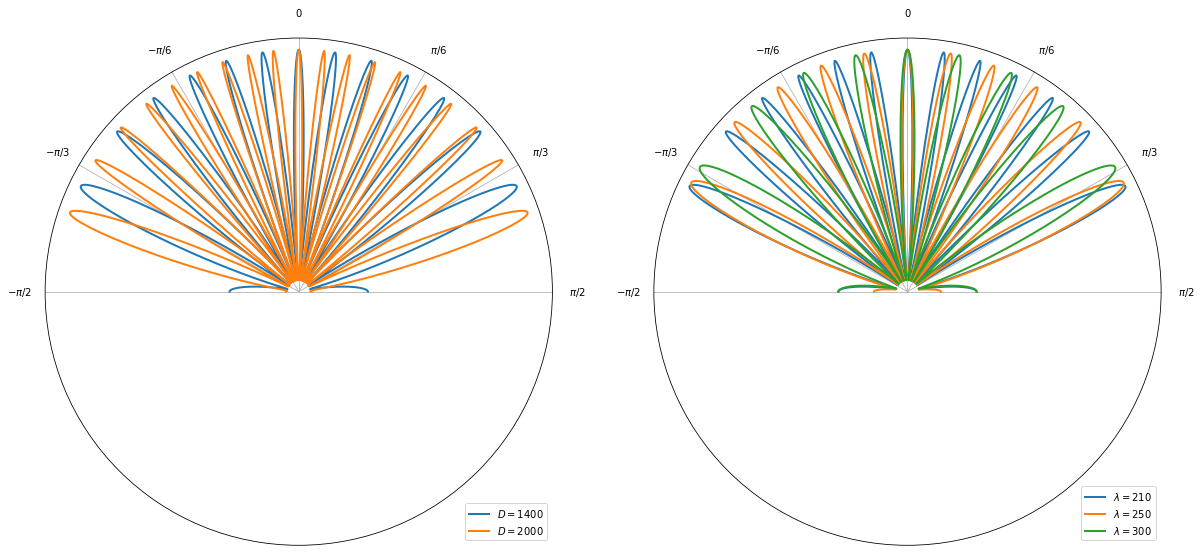

In [33]:
plt.rcParams['figure.figsize'] = (20, 12)
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = [210, 250, 300]
d = [1400,2000]
I = {}
for bl in d:
    I[bl] = {}
    for l in wv:
        I[bl][l] = (np.cos(np.pi*bl*np.sin(theta)/l))**2

ax = plt.subplot(121,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
for bl in d:
    ax.plot(theta,I[bl][wv[0]],lw=2,label=r'$D = %d$'%bl)
ax.legend(loc=4)

ax1 = plt.subplot(122,projection='polar')
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax1.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax1.set_yticks([])
ax1.set_yticklabels([])
for l in wv:
    ax1.plot(theta,I[d[0]][l],lw=2,label=r'$\lambda = %d$'%l)
ax1.legend(loc=4)
plt.rcParams['figure.figsize'] = (10, 6)

## Multiple antennas

### Linear array

Now consider an array of 5 antennas at equal distance from each other.

<pre>
\___/   \___/   \___/   \___/   \___/
  |       |       |       |       |
  |---d---| 
</pre>

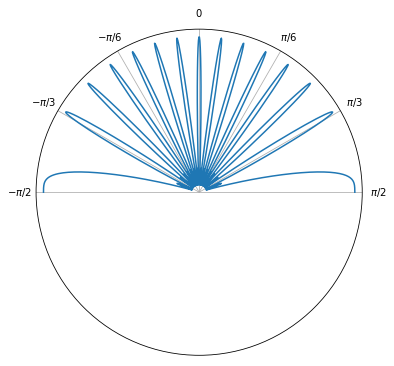

In [37]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = 200
d = 1400
N = 3

phi = np.pi*d*np.sin(theta)/wv
I = (np.sin(N*phi)/np.sin(phi))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)

# Dipole antenna

The radiation pattern of a dipole antenna is analogous to the Airy pattern of a circular aperture.

$$E_{\theta} = \frac{-iI_0}{2\pi \epsilon_0 c r}\frac{\cos\left(\frac{\pi}{2}\cos{\theta}\right)}{\sin{\theta}}$$